In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

# Carga de datos

In [35]:
ds = load_diabetes() 
datos = pd.DataFrame(ds.data, columns = ds.feature_names)
datos.head(30)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


# Separar Variables 

In [38]:
datos['disease_progression'] = ds.target
X = datos.drop('disease_progression', axis = 1)
y = datos['disease_progression']

# Creacion del modelo

In [40]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

# Creacion de Escenarios

In [44]:
datos_bmi_asc = datos.copy()
datos_bmi_asc['bmi'] *= 1.10

datos_bp_desc = datos.copy()
datos_bp_desc['bp'] *= 0.90

datos_ambos = datos.copy()
datos_ambos['bmi'] *= 1.10
datos_ambos['bp'] *= 0.90

# Predicciones

In [47]:
pred_original = modelo.predict(X)
pred_bmi_asc = modelo.predict(datos_bmi_asc.drop('disease_progression',
                             axis = 1))
pred_bp_desc = modelo.predict(datos_bp_desc.drop('disease_progression',
                             axis = 1))
pred_ambos = modelo.predict(datos_ambos.drop('disease_progression',
                             axis = 1))


# Comparar Escenarios

In [50]:
resultados = pd.DataFrame({
    "Original": [np.mean(pred_original)],
    "BMI + 10%": [np.mean(pred_bmi_asc)],
    "BP - 10%": [np.mean(pred_bp_desc)],
    "Ambos Cambios": [np.mean(pred_ambos)]
},index = ['Porcentaje Progresion Enfermedad'])

print("Promedios por Escenarios")
print(resultados.T)

Promedios por Escenarios
               Porcentaje Progresion Enfermedad
Original                             152.133484
BMI + 10%                            152.133484
BP - 10%                             152.133484
Ambos Cambios                        152.133484


# Visualizacion de los cambios 


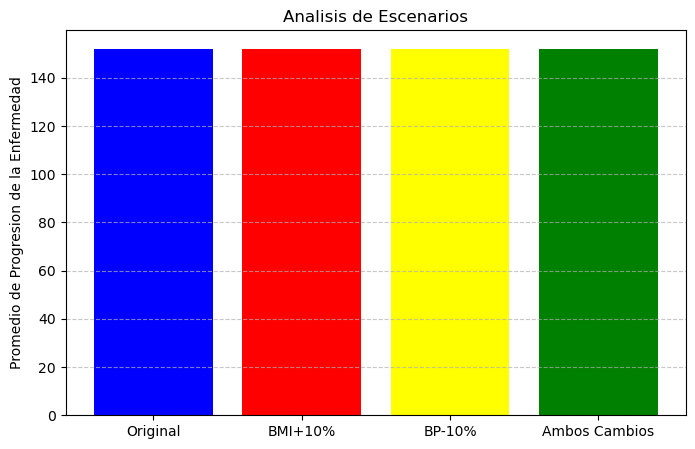

In [53]:
escenarios = ['Original', 'BMI+10%', 'BP-10%', 'Ambos Cambios']
valores = [np.mean(pred_original),
          np.mean(pred_bmi_asc),
          np.mean(pred_bp_desc),
          np.mean(pred_ambos)]

plt.figure(figsize = (8, 5))
plt.bar(escenarios, valores, color = ['blue', 'red','yellow','green'])
plt.ylabel("Promedio de Progresion de la Enfermedad")
plt.title("Analisis de Escenarios")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

# Interpretacion de Coeficientes

In [56]:
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficientes": modelo.coef_
}).sort_values(by = "Coeficientes", ascending = False)

print("\n Importancia de las Variables")
print(coeficientes)


 Importancia de las Variables
  Variable  Coeficientes
8       s5    751.273700
2      bmi    519.845920
5       s2    476.739021
3       bp    324.384646
7       s4    177.063238
6       s3    101.043268
9       s6     67.626692
0      age    -10.009866
1      sex   -239.815644
4       s1   -792.175639


# Visualizacion de Coeficientes

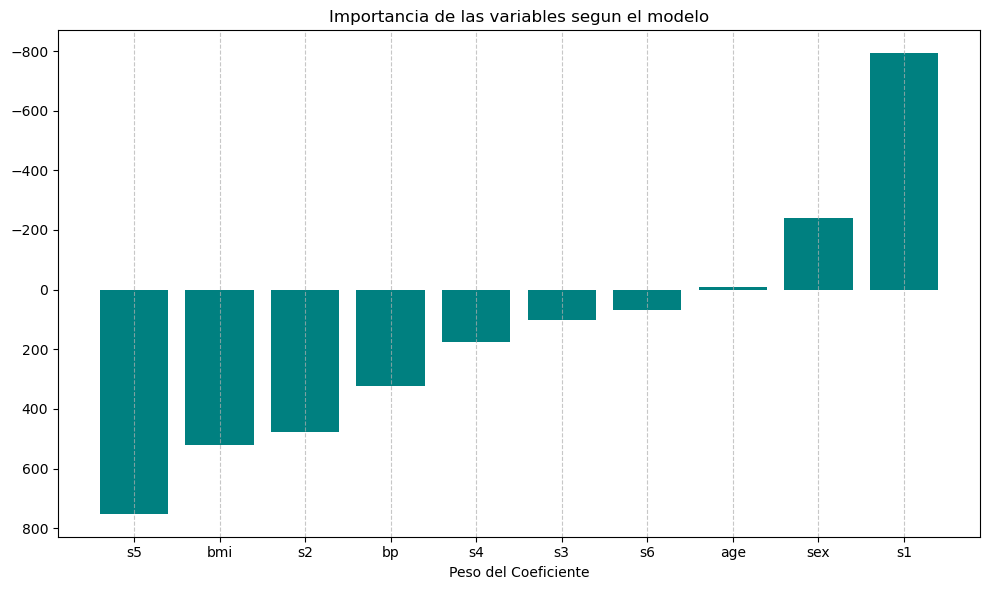

In [73]:
plt.figure(figsize = (10,6))
plt.bar(coeficientes["Variable"],
        coeficientes["Coeficientes"],
        color = "teal")
plt.xlabel("Peso del Coeficiente")
plt.title("Importancia de las variables segun el modelo")
plt.grid(axis = "x", linestyle = '--', alpha = 0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()